In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import desimodel.io
import numpy as np

In [2]:
tiles = desimodel.io.load_tiles()

In [3]:
filename = "/global/cfs/cdirs/desi/users/schlafly/surveysim/exposures_nopass7.fits"

In [4]:
exposures = Table.read(filename, hdu=1)
tiledata = Table.read(filename, hdu=2)

In [5]:
exposures

EXPID,MJD,EXPTIME,TILEID,SNR2FRAC,AIRMASS,SEEING,TRANSP,SKY
float64,float64,float32,int32,float32,float32,float32,float32,float32
0.0,58819.063888888886,710.0,5518,0.39697963,1.005711,1.13452,0.99985045,1.0
1.0,58819.07349537022,790.0,5547,0.16740978,1.0181136,1.545953,0.9999317,1.0
2.0,58819.08402777746,650.0,5547,0.30887935,1.0176361,1.1522777,0.9999577,1.0
3.0,58819.092245369924,880.0,5547,0.44783556,1.0176361,1.0760727,0.99954134,1.0
4.0,58819.103124999376,1010.0,5547,0.58770275,1.0176361,0.96076524,0.9998206,1.0
5.0,58819.11550925843,1900.0,5547,0.7259124,1.0176361,1.1320813,0.99528205,1.0
6.0,58819.13819444323,600.0,5547,0.77275324,1.0176361,1.5690123,0.99744713,1.0
7.0,58820.063888888886,730.0,1055,0.5019894,1.0013258,0.9638074,0.9909347,1.0
8.0,58820.07303240726,760.0,1055,0.85098183,1.0013258,1.3399286,0.9958159,1.0


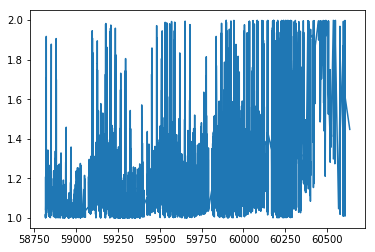

In [6]:
plt.plot(exposures['MJD'], exposures['AIRMASS'])

In [7]:
exposures['MJD_OFFSET'] = exposures['MJD'] - exposures['MJD'].min()

In [29]:
a, b = np.unique(exposures['TILEID'], return_index=True)
unique_tiles = exposures['TILEID'][np.sort(b)]
unique_dates = exposures['MJD_OFFSET'][np.sort(b)]

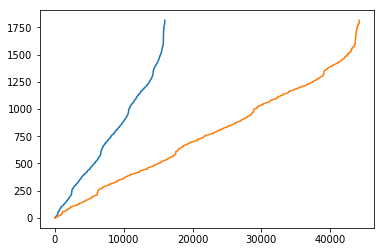

In [30]:
plt.plot(unique_dates)
plt.plot(exposures['MJD_OFFSET'])

In [8]:
ii = np.isin(tiles['TILEID'], exposures['TILEID'])
print(np.count_nonzero(ii), len(tiles))

15967 15984


<built-in function len>


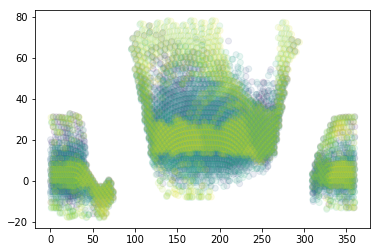

In [72]:
min_day_id = 0
max_day_id = 800
ii = (unique_dates>=min_day_id) & (unique_dates<max_day_id)
tiles_in_batch = unique_tiles[ii]

jj = np.isin(tiles['TILEID'], tiles_in_batch)
plt.scatter(tiles['RA'][jj], tiles['DEC'][jj], c=unique_dates[ii], alpha=0.1)
print(len)

<built-in function len>


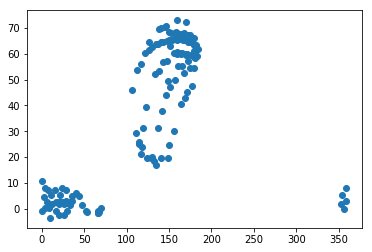

In [35]:
exposures['TILEID'][exposures['MJD_OFFSET']<28]

5518
5547
5547
5547
5547
5547
5547
1055
1055
1072
1072
